# Linear Regression - Classical approach

Signification des émoticones :
- 🌞 : documentations importantes
- 👀 : documentations intéressantes à connaître
- 🌚 : en complément
- (vide) : à vous de voir

The objective of this notebook is to introduce the *classical approach to linear regression*. It will help you understand:
* When you would use a classical statistical approach as opposed to a *machine learning* approach
* How to implement classic linear regression in python
* 👀 How to use the [statsmodels](https://www.statsmodels.org/stable/index.html) library
* How to select variables to include in a model using a classical *model selection* approach
* How to implement and interpret residual plots for model checking

🌚 Help : Book ISL
https://trevorhastie.github.io/ISLR/

<img src="./images/ISLcover.jpg" width="300px">

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline

## What do we mean by linear regression?

At the moment there is often a battle between the traditional discipline of statistics and the relatively new discipline of data science. In general it seems more 'classic' statistical modelling can sometimes be more interpretable, whereas 'algorithmic modelling' from data science/computer science fields can *sometimes* offer more practical prediction capabilities.

<img src="./images/ml_xkcd.png" width="300px">

There has been some attempt at the formalisation of this discussion, and calls for the two fields to work more closely together.

>"There are two cultures in the use of statistical modeling to reach conclusions from data. One assumes that the data are generated by a given stochastic data model. The other uses algorithmic models and treats the data mechanism as unknown. The statistical community has been committed to the almost exclusive use of data models. This commitment has led to irrelevant theory, questionable conclusions, and has kept statisticians from working on a large range of interesting current problems. Algorithmic modeling, both in theory and practice, has developed rapidly in fields outside statistics. It can be used both on large complex data sets and as a more accurate and informative alternative to data modeling on smaller data sets. If our goal as a field is to use data to solve problems, then we need to move away from exclusive dependence on data models and adopt a more diverse set of tools."
>
>🌚 [*Leo Breiman*,  Statistical Modeling: The Two Cultures (with comments and a rejoinder by the author), *Statistical Science*, Volume 16, Issue 3 (2001), pp.199-231.](https://projecteuclid.org/euclid.ss/1009213726)

In practice it is often difficult to seperate the two disciplines as there is a lot of overlap between the two. There is also a lot of interchangable terminology, i.e. terms which are used by each discipline which often mean the same thing but have different names. This includes peoples CVs...

<img src="./images/trek.jpg" width="300px">

We will not focus too much energy this debate. However it is important to understand how to frame the type of problem you are working on in order that you can choose a suitable approch/methodology.

One such area where this difference can be confusing is when using *linear regression*. Both traditional statisticians and data scientists use linear regression, but often apply this using two different approaches. 

Both approaches attempt to estimate an *output variable*, $Y$, based on *input variables*, $X$. Where there can be any number of input variables $p$, i.e. $X$ = ($X_1$, $X_2$,...,$X_p$). We assume there is some relationship between $Y$ and $X$ which we denote by $f$. $ϵ$ denotes the *error term* which is independent of $X$.

<div style="font-size: 100%;" align= "center"> 
Y = f(X) + ϵ
</div>

Linear regression is an example of a *parametric* method for which we make an assumption about the form of $f$ (the assumption being that it is linear in $X$).

<div style="font-size: 100%;" align= "center">  
Y = β_0 + β_1 X_1 + β_2 X_2 + ... + β_p X_p + ϵ_i
</div>

For only a single input variable $X$ we would simply have:
<div style="font-size: 100%;" align= "center">  
Y = β_0 + β_1 X_1 + ϵ_i
</div>

Which is the same as the formula you will have seen before in school:

<div style="font-size: 100%;" align= "center"> 
y = c+ mx
</div>

NOTE: The input variables or $X$ values are reffered to be many names: *predictors, independent variables, features,* or sometimes just *variables* (depending on which field you work in). Similarly the *output variable* (usually denoted $Y$) can be sometimes referred to as the *response, target* or *dependent variables*.

### Classical or Machine Learning approach?
Chapter 2 in **ISLR** gives a great introduction to this issue (and the chapter explains the basis of everything that you will do/learn over the linear regression and the machine learning modules). For this exercise you need to understand there are broadly two main approaches in which we may wish to use linear regression: the classical statistical approach and a more algorithmic/machine learning approach. 

Broadly:

We may use a **Classical statistical** approach when we are interested in understanding and quantifying the relationship between $Y$ and $x$ (or $x$'s). i.e. what affect does a change in $x$ make to $Y$. 

A **ML (Prediction)** approach can be used when we are focussed solely on creating a model which can take inputs $X_{1}$, $X_{2}$ ...$X_{p}$ and can return a prediction of $Y$.

Feel free to argue with these definitions, the authors of ISLR themselves agree the cross-over between ML and classic statsitical methods is very often not clear, but they will help you answer the questions below. 

### Exercise 1 - defining types of problems

Write down, for each case below, whether you would use a **classical statistical** approach or a **ML prediction** approach to solve the problem.

1. A company approaches you who are interested in conducting a direct-marketing campaign. The goal is to identify individuals who will respond positively to a mailing, based on observations of demographic variables measured on each individual. They will then only mail those who they think will respond positively to mailing in order to have maximum impact for minimum cost.

<img src="./images/letters.jpg" width="300px">


2. You have been contacted by Nicolas Cage. He has many offers for roles in new upcoming movies but cannot accept them all. He wishes to use historical data to determine which of the movies being offered are likely to be the greatest success. He defines sucess as the greater amount of money a movie made. He explains he wants to know which factors, i.e. number of award winning actresses, budget, movie length etc, are most important in determining a movies' success.

<img src="./images/Nic.jpg" width="300px">


3. An international charity "Water for All" has contacted you. They have been collecting usage, current status (working/not-working) & maintence data on rural-community water pumps across several countries in Africa. They wish to know if it possible to use mathematical models to understand when future failure of each water pump will occur. This will allow them to dispatch their teams in advance to provide protective maintenance to prevent the pump failure.

<img src="./images/water_pump.jpg" width="300px">


4. You have just been employed by the Grenoble police department as their first data scientist. They are excited for you to arrive as they have been told by a very expensive management consulant that 'data science' is the future of policing. They have collated all information they have on the dates, times, geographic location and hand written reports of historical crimes in Grenoble over the last decade. They are waiting for you to tell them where the next crime will happen so they can dispatch their officers in advance to catch the bad guys before the crime occurs!


5. *The Irresistable Cholocolate Company* has begun testing new recipes of chocolate. They have hired Sean Bean as their new head of research. With his insistence their consumer model is now to make chocolate so irresistable that customers have no choice but finish it as soon as possible, and then have to buy more... hence increasing sales. Their new recipe contains a *secret ingredient*, which is not disclosed. It is unclear if the new recipe will pass legal standards, but regardless, the research team have begun consumer testing. They have been creating chocolate bars with different proportions of this ingredient and have been measuring the time it takes for customers to consume the whole bar. Mr Bean would like to know more about how the proportion of the secret ingredient added affects the time taken to consume the bar. This will allow his research team to perfect the new recipe. 

<img src="./images/choc.jpg" width="200px">

**Your answers here: (choose 'classical' or 'ML')**
1. Classical
2. Classical
3. ML
4. ML
5. ML

## Implementing linear regression in python

The rest of this notebook is focussed only on using a classic linear regression approach.

Let's make some random data for us to work on.

In [2]:
np.random.seed(25)
x = np.random.normal(size = 40)
y = 1.6*x + np.random.normal(size = 40)

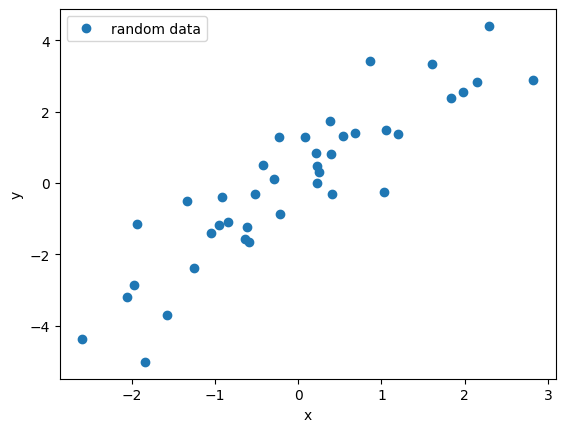

In [3]:
plt.plot(x, y, 'o', label='random data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

As you already know there are many excellent 3rd party libraries in python that you can import, so that you dont have to write all the code yourself. It turns out scipy has a function that allows us to do linear regression that a kind open source developer has already made for us.

In [4]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)

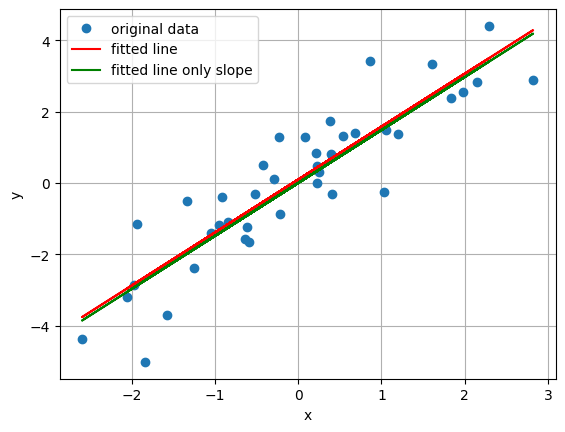

In [5]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, slope*x, 'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

As well as the slope and intercept of the fitted model, which allow us to create the plot above, the function ```linregress()``` also returns other information when it is called.

**Task 1:** 
* Print the slope and intercept, do they match what you think it should be based on the plot and equation used to generate the data?
* What is the correlation coefficient of the linear regression?

In [6]:
#### Print slope and intercept
print (slope,intercept)

1.4831232347196697 0.09602333966709839


In [7]:
### Correlation coefficient of the linear regression
print(r_value)

0.8970244827274227


* conduct a linear regression for the arrays x2, y2 below
* print slope, intercept, correlation coefficient
* make a scatter plot of the data and the fitted regression model

In [8]:
x2 = np.array([ 0.22827309,  1.0268903 , -0.83958485, -0.59118152, -0.9568883 ,
       -0.22232569, -0.61991511,  1.83790458, -2.05323076,  0.86858305,
       -0.92073444, -0.23231186,  2.1529569 , -1.33466147,  0.07637965,
       -1.24608928,  1.20227231, -1.04994158,  1.05661011, -0.41967767,
        2.29484234, -2.59448738,  2.8227564 ,  0.68088892, -1.57769345,
       -1.97625359,  0.53333982, -0.29086971, -0.51351967,  1.98262608,
        0.22600105, -1.83990496,  1.60767083,  0.38829194,  0.39973206,
        0.4054766 ,  0.21700177, -0.6334391 ,  0.24662153, -1.93954552])

In [9]:
y2 = np.array([-0.18269538, -3.2202988 ,  1.33454079,  0.0630553 ,  1.6085824 ,
       -0.21392876,  0.58013809, -2.95481368,  2.772595  ,  0.88925045,
        2.29120304,  1.96443982, -3.42629745,  3.35625955,  1.07883913,
        1.24503731, -2.10728298,  1.65268524, -1.57941313,  1.73556883,
       -2.25436816,  3.15079347, -5.2922891 , -0.57261505,  0.89058007,
        2.88268935, -0.22134391,  0.95599233,  1.17298232, -3.20390167,
       -0.64017069,  0.32593461, -1.32103579,  0.6240868 , -0.35272815,
       -1.49437497,  0.20989395,  0.27261366, -0.40530206,  4.48897751])

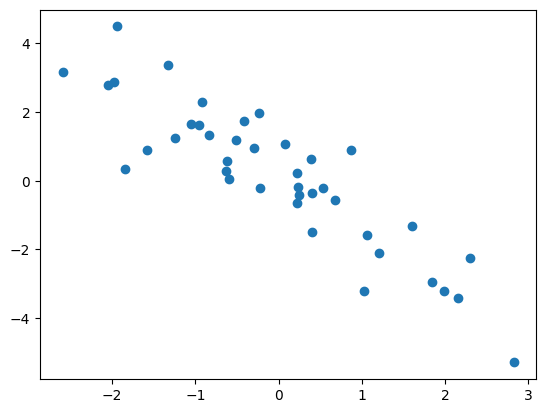

In [10]:
plt.scatter(x2, y2)

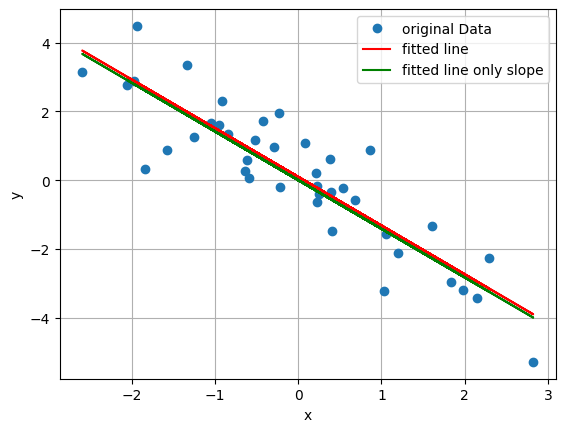

In [11]:
### your solution here
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x2, y2)

plt.plot(x2,y2,'o', label='original Data')
plt.plot(x2, intercept + slope*x2,'r', label='fitted line')
plt.plot(x2,slope*x2,'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
print(intercept,slope,r_value)

0.09602333952431144 -1.4168767639318265 -0.8887557239380878


## Four different datasets: different regression results?

We can be tempted to pass the exploratory data analysis step and directly apply a linear regression model to find quick results.

**Task 3:**

The file four_datasets.csv in the folder data contains four small datasets. Find a linear regression model for each of the four sets, **without plotting the data first**. Compare the coefficients. What do you conclude based on this?

In [13]:
### Your solution here
four_data_set=pd.read_csv('data/four_datasets.csv')
slope, intercept, r_value, p_value, std_err = linregress(four_data_set['x1'], four_data_set['y1'])
print('slope =', slope, 'intercept =', intercept, 'r_value =', r_value)

slope = 0.5000909090909091 intercept = 3.0000909090909103 r_value = 0.8164205163448399


In [14]:
slope, intercept, r_value, p_value, std_err = linregress(four_data_set['x2'], four_data_set['y2'])
print('slope =', slope, 'intercept =', intercept, 'r_value =', r_value)

slope = 0.5000000000000001 intercept = 3.000909090909089 r_value = 0.816236506000243


In [15]:
slope, intercept, r_value, p_value, std_err = linregress(four_data_set['x3'], four_data_set['y3'])
print('slope =', slope, 'intercept =', intercept, 'r_value =', r_value)

slope = 0.4997272727272729 intercept = 3.002454545454544 r_value = 0.8162867394895984


In [16]:
slope, intercept, r_value, p_value, std_err = linregress(four_data_set['x4'], four_data_set['y4'])
print('slope =', slope, 'intercept =', intercept, 'r_value =', r_value)

slope = 0.4999090909090909 intercept = 3.0017272727272726 r_value = 0.8165214368885028


In [17]:
#Ils ont des coefficient de corrélation très similaires

* Now make a plot of each dataset, including the linear regression line

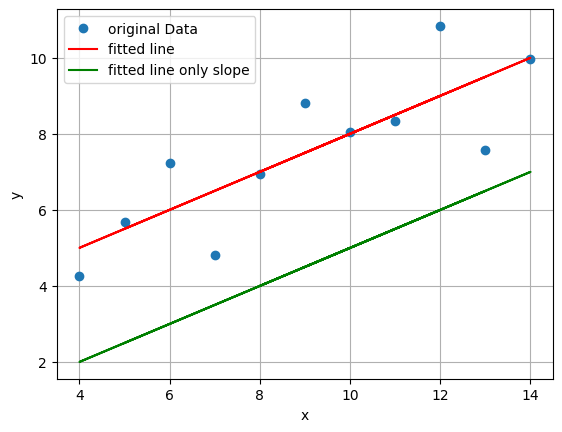

In [18]:
### Your solution here
plt.plot(four_data_set['x1'],four_data_set['y1'],'o', label='original Data')
plt.plot(four_data_set['x1'], intercept + slope*four_data_set['x1'],'r', label='fitted line')
plt.plot(four_data_set['x1'],slope*four_data_set['x1'],'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

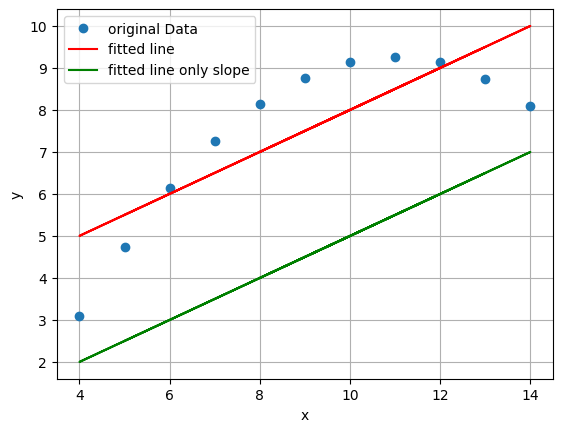

In [19]:
plt.plot(four_data_set['x2'],four_data_set['y2'],'o', label='original Data')
plt.plot(four_data_set['x2'], intercept + slope*four_data_set['x2'],'r', label='fitted line')
plt.plot(four_data_set['x2'],slope*four_data_set['x2'],'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

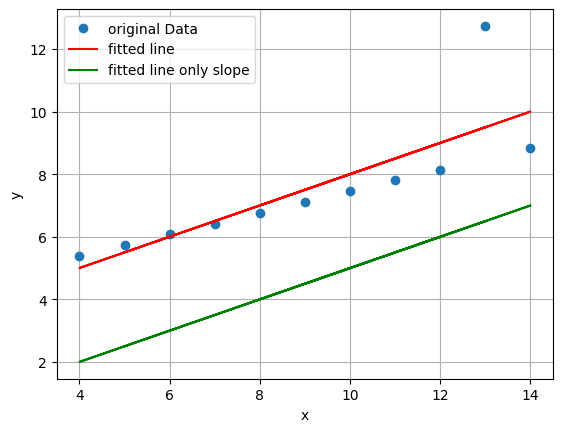

In [20]:
plt.plot(four_data_set['x3'],four_data_set['y3'],'o', label='original Data')
plt.plot(four_data_set['x3'], intercept + slope*four_data_set['x3'],'r', label='fitted line')
plt.plot(four_data_set['x3'],slope*four_data_set['x3'],'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

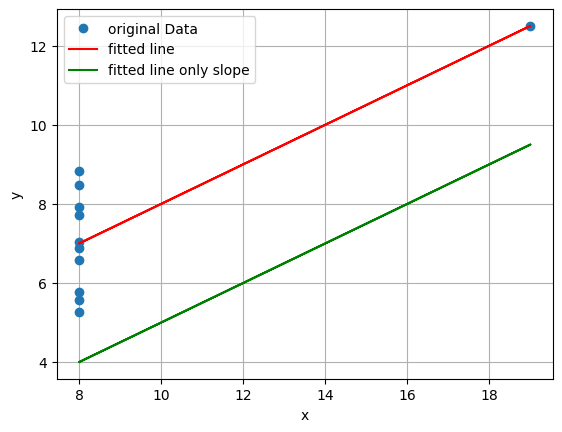

In [21]:
plt.plot(four_data_set['x4'],four_data_set['y4'],'o', label='original Data')
plt.plot(four_data_set['x4'], intercept + slope*four_data_set['x4'],'r', label='fitted line')
plt.plot(four_data_set['x4'],slope*four_data_set['x4'],'green', label='fitted line only slope')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

* What do you conclude now?

In [22]:
#Bah je sais pas trop... c'est assez confus

#### Statsmodels package 

Although the scipy package offers many statistical functions, there are more specialised statistical packages on offer such as **statsmodels**. This package allows you to complete linear regression as well as many other statistical methods and test. You can browse its offerings [here](https://www.statsmodels.org/stable/index.html). It uses a syntax and has output close to that of the **R** language and ecosystem, which is specialised statistical software/language.

We can use it to model the same random data we looked at above.

👀 To better understand how OLS works : https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

In [23]:
np.random.seed(25)
x = np.random.normal(size = 40)
y = 1.6*x + np.random.normal(size = 40)

In [24]:
import statsmodels.api as sm

x = sm.add_constant(x) # an intercept term to the model
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           4.78e-15
Time:                        10:21:23   Log-Likelihood:                -54.427
No. Observations:                  40   AIC:                             112.9
Df Residuals:                      38   BIC:                             116.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0960      0.153      0.627      0.5

In [25]:
results.params

array([0.09602334, 1.48312323])

**Task 3:**

To help understand the output, write down what the terms being reported mean:
* R-squared
* coef (regression coefficient)
* std err (standard error)
* P>|t| (p-value)
* [0.025 0.975] (confidence intervals)

Write down what *least squares* regression is.

NOTE: ISLR introductory chapters explain most of these. If not look them up online.

In [26]:
#### your answer here
#R-squared : Montre a quel point la data correspond au modéle de regression (est proche de 1)
#coef(regression coefficient): Décrit l'importance et le sens de la relation entre un prédicteur et la variable de réponse
#std err(standard error): Flux de donnée généré par les programmes informatique lorsqu'ils rencontrent une erreur ou une condition exeptionnelle
# P>|t| (p-value) : A la possibilité de trouver une différence moy. par hasard  s'il n'existe aucune différence dans la population
#[0.025 0.975] (confidence intervals): Est un intervalle censé contenir un paramètre inconnu de la loi de probabilité d'une variable quantitative

### Exercise 2 - looking for associations in Emergency Departments

Emergency departments across the westernised world are suffering from increasing number of patient visits and find themselves more often overcrowded. Overcrowding has been linked to worse patient health outcomes and waiting times within hospital. The search to understand why this is occuring and what can be done to alleviate overcrowding is currently an [active area of research](https://emj.bmj.com/content/early/2019/11/25/emermed-2018-207917).

One theory is that if the main hospital is full then patients will be forced to stay in the Emergency Department as they cannot be moved into the main hospital. This may result in the Emergency Department becoming overcrowded. In the UK patients who are medically fit to return home but are still in hospital are reffered to as 'delayed transfers of care' (or DTOCS for short). The number of occurances of this is measured in hospitals. The number of long waiting times in Emergency Departments (longer than 4 hours) are also recorded.

These data are given in temporal order (monthly).

Your job as data scientist is to understand if there is a relationship between the numbers of DTOCS and the numbers of long-waits in Emergency Departments.

**Task 1**

You must:
* load the data
* plot the 2 time series with 2 curves
* plot then the data as a scatter plot (Y : dtocs, X : long_waits)
* run a linear regression using statsmodels
* add your regression line to the scatter plot
* describe what the p-values, confidence intervals and r-squared values indicate. 

<details><summary>HINT</summary><br>
when adding the regression line the `params` attribute (of the `model` object) contains the fitted coefficients
</details>

In [27]:
def load_dtoc_dataset():
    '''
    Loads the long_wait and dtoc data sets into memory
    Returns a tuple of numpy.ndarrays representing
    breach and dtoc dataset respectively.
    '''
    #note we use skip_header because the dataset has column descriptors
    dtocs = np.genfromtxt('./data/dtocs.csv', skip_header=1)
    long_waits = np.genfromtxt('./data/long_waits.csv', skip_header=1)
    return long_waits, dtocs
    
    
long_waits, dtocs = load_dtoc_dataset()

In [28]:
#### load and plot
slope, intercept, r_value, p_value, std_err = linregress(long_waits, dtocs)
print('slope =', slope, 'intercept =', intercept, 'r_value =', r_value)

slope = 0.012365820463215615 intercept = 3376.0495039671114 r_value = 0.8449001197808715


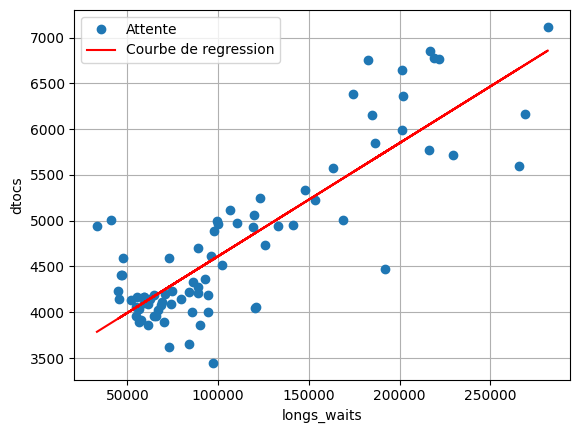

In [29]:
plt.plot(long_waits, dtocs, 'o', label='Attente')#time series
plt.plot(long_waits, intercept + slope*long_waits,'r', label='Courbe de regression')#courbe de regressions
plt.xlabel('longs_waits')
plt.ylabel('dtocs')
plt.grid(True)
plt.legend()#affiche les legends
plt.show()

In [30]:
print('la p_value',p_value, 'étant faible, on peut en conclure que la variable à un effet')


la p_value 6.797258860447877e-23 étant faible, on peut en conclure que la variable à un effet


In [31]:
from scipy.stats import linregress
rsquared=r_value**2
print('la valeur de',rsquared, 'indique que mon modéle explique 71% de la variance')


la valeur de 0.713856212405731 indique que mon modéle explique 71% de la variance


In [32]:
#mon intervalle de confiance est de 95% (5%)


Plot above contains a trend. It seems that over the years, increasing long waits leads to increased dtocs!! But we are interested in whether period change in long_waits is really related to period change in dtocs.

Another data scientist informs you that there is a problem using linear regression when the data is a time series.
🌚 Take a look at this link to understand why : https://medium.com/data-science/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0

A basic way of dealing with this issue is to take a first difference of the data, to observe whether the evolutions of the 2 features go hand in hand in the short term.
To compute the first difference of a series of data, we subtract each value from the subsequent value in the series. 

You must:
* Create a new numpy array which contains the first differenced values of the long_waits array
* Create a new numpy array which contains the first differenced values of the DTOCS array
* Plot the data as a scatter plot
* Perform linear regression using statsmodels on this differenced data
* add your regression line to the scatter plot
* describe what the p-values, confidence intervals and r-squared values indicate.

HINT

* Numpy contains a function called ```np.diff()``` that might help

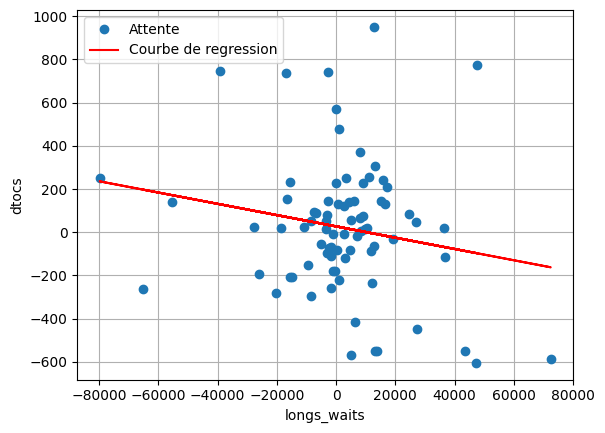

In [33]:
#### your solution here
diff_values_longwaits=np.diff(long_waits)
diff_values_dtocs=np.diff(dtocs)

slope, intercept, r_value, p_value, std_err = linregress(diff_values_longwaits, diff_values_dtocs)

plt.plot(diff_values_longwaits, diff_values_dtocs, 'o', label='Attente')#time series
plt.plot(diff_values_longwaits, intercept + slope*diff_values_longwaits,'r', label='Courbe de regression')#courbe de regressions
plt.xlabel('longs_waits')
plt.ylabel('dtocs')
plt.grid(True)
plt.legend()#affiche les legendes
plt.show()

In [34]:
print('La p_value',p_value,'étant forte (+ de 0.05), on peut en déduire que la variable na pas deffet')


La p_value 0.09978495813698546 étant forte (+ de 0.05), on peut en déduire que la variable na pas deffet


In [35]:
rsquared2=r_value**2
print ('La valeur rsquared étant de', rsquared2,'on peut dire que mon modéle explique 97% de la variable')

La valeur rsquared étant de 0.034790425785325166 on peut dire que mon modéle explique 97% de la variable


In [36]:
#Mon intervalle de confiance est de 99.5% (0.5%)

In [37]:
#La P_value étant supérieur a 0.05% et le Rsquared étant faible, ce n'est pas les temps d'attentes qui influent sur la prise en charge des patients

In [38]:
import statsmodels.api as sm

x = sm.add_constant(diff_values_longwaits) # an intercept term to the model
model = sm.OLS(diff_values_dtocs, diff_values_longwaits)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              2.569
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                       0.113
Time:                        10:21:23   Log-Likelihood:                         -564.23
No. Observations:                  79   AIC:                                      1130.
Df Residuals:                      78   BIC:                                      1133.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Residual plots
For completenes we need to consider if the assumptions we made when implementing our linear regression are valid. According to **ISTL**
> When we fit a linear regression model to a particular data set, many problems may occur. Most common among these are the following:
> 1. Non-linearity of the response-predictor relationships.
> 2. Correlation of error terms.
> 3. Non-constant variance of error terms.
> 4. Outliers.
> 5. Collinearity.
>
> In practice, identifying and overcoming these problems is as much an
art as a science. Many pages in countless books have been written on this
topic. Since the linear regression model is not our primary focus here, we
will provide only a brief summary of some key points

If you need to know about this in future a good place to start is the overview of these problems **ISLR** section *3.3.3.*. 

Here we will now focus on how to produce some of the diagnostic plots in python which help us assess these issues. In my experience producing these plots in python sometimes takes a lot more thought/work than using R packages which are specialised for this kind of statistical work. 

Some other resources:

👀 https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

👀 https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

🌚 https://www.statsmodels.org/stable/diagnostic.html

🌞 https://medium.com/data-science/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

#### Normality

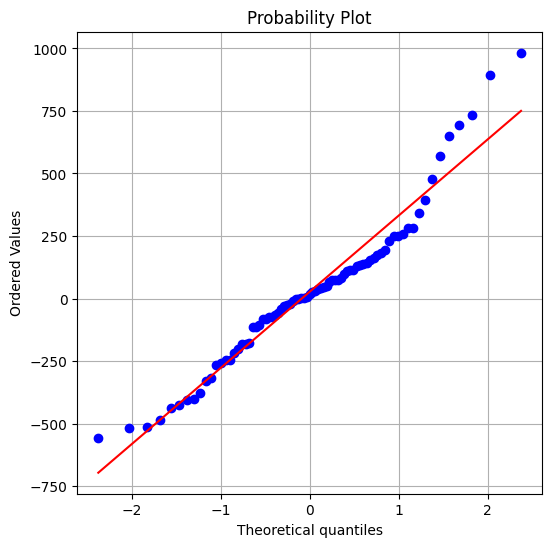

In [39]:
from scipy.stats import probplot 
fig, ax = plt.subplots(figsize=(6,6))
probplot(results.resid, plot=ax, fit=True) # the resid attribute contains a numpy array of the residuals
plt.grid(True)

#### Linearity & Non-constant variance

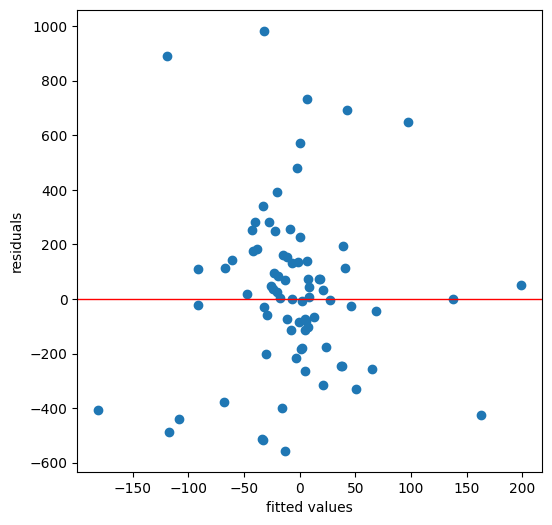

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')
ax.axhline(linewidth=1, color='r')
plt.show()

**Task 3**: 
* Reproduce the plots above but for the model that used differenced data that you produced earlier
* What would you conclude from each of these plots? Does your fitted model satisfy all of the assumptions to mean it is trustworthy? 

In [41]:
#### your solution here
import statsmodels.api as sm

x = sm.add_constant(diff_values_longwaits) # an intercept term to the model
model = sm.OLS(diff_values_dtocs, diff_values_longwaits)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              2.569
Date:                Tue, 14 Oct 2025   Prob (F-statistic):                       0.113
Time:                        10:21:24   Log-Likelihood:                         -564.23
No. Observations:                  79   AIC:                                      1130.
Df Residuals:                      78   BIC:                                      1133.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
results

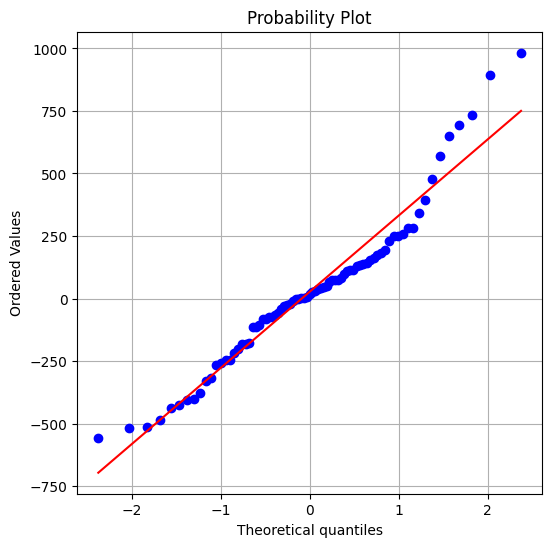

In [43]:
from scipy.stats import probplot
fig, ax = plt.subplots(figsize=(6,6))
probplot(results.resid, plot=ax, fit=True) # the resid attribute contains a numpy array of the residuals
plt.grid(True)

In [44]:
#La propability plot est pour voir si nos résidus suivent loi normal, ici il la suivent plutot bien

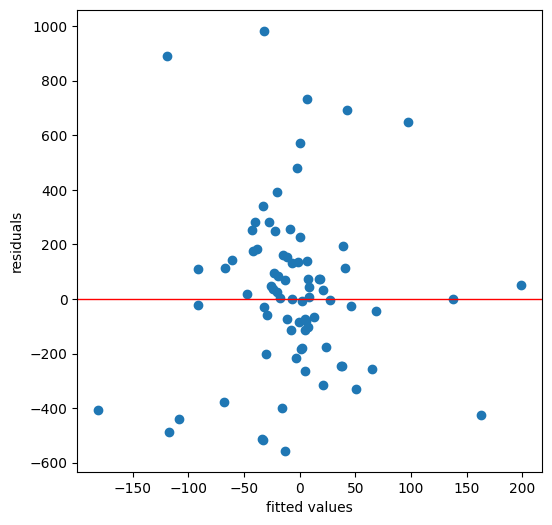

In [45]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')
ax.axhline(linewidth=1, color='r')
plt.show()

In [46]:
#Là nos résidus ne devraient pas être concentrés comme cela il devraient être dispersés

## Variable selection

Usually we may have multiple measurements and we are unsure which are able to best explain the variable we are trying to predict. Then we use *multiple* linear regression to determine which variables are important.

For example we can consider the effect of advertising budgets for various media on overall sales of a product. See **ISLR** chapter 3. Here TV, Radio and Newspaper are individual advertising budgets and sales is the total numbers of a produce sold.

In [47]:
#### import advertising data
advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We can use statsmodels to fit a *multiple* linear regression model using the same code as before. It will take a 1-d array as the $Y$ variable, and a 2-d numpy matrix for the $X$ vars (where each column represents the data associated with $X1, X2, ...X_{p}$). 

**Note: we are now passing a pandas series (for $Y$, 1d), and a pandas dataframe(for $X$, 2d). This is much more convenient as statsmodels knows to use the series/dataframe titles as labels for our summary output.**

In [48]:
def perform_linear_regression(Y,X):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.
    
    Input
    =====
    Y, pandas series,
    X, pandas dataframe,
    
    Return
    ======
    results, statsmodel linear regression results object
    
    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
    print(results.summary().tables[1])
    return(results)


sales = advertising['Sales']
media_budgets = advertising[['TV','Radio','Newspaper']]

results = perform_linear_regression(sales, media_budgets)

Adjusted R-squared: 0.896
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In selecting a good model that only uses important media budget variables to explain the relationship of sales we would probably remove the Newspaper variable from our model (see chapter 3 for a detailed explantion of this). As you can see below the adjusted r-squared value is similar, and so we have not lost any information in our model. This was a good decision.

In [49]:
sales = advertising['Sales']
media_budgets = advertising[['TV','Radio']]

results = perform_linear_regression(sales, media_budgets)

Adjusted R-squared: 0.896
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204


### Automating variable selection

Sometimes we have too many variables to manually check every possible combination of variables. The number of possible models quickly gets out of hand because there are $2^p$ models that contain subsets of $p$ variables. This means that even for moderate $p$, trying out every possible subset of the variables is infeasible. For instance, we saw that if $p = 2$, then
there are $2^2 = 4$ models to consider. But if $p = 30$, then we must consider $2^{30} = 1,073,741,824$ models!

One classical method for variable selection is *backward selection*. Here we start with all variables in the model, and backward remove the variable with the largest p-value — that is, the variable selection that is the least statistically significant. The new $(p − 1)$-variable model is fit, and the variable with the largest p-value is removed. This
procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold. (see **ISLR** section 3.2 'Two: deciding on important varaibles' for more info)

### Exercise 3: Finding alcohol content of wine using other characteristics

You will find a data set containing attributes of different types of wine in `wine.csv` in the data folder. Your task is to find which other variables are important in explaining the alcohol content.

You must:
* perform a linear regression using all the variables
* write a piece of code to implement backwards selection.

Your solution, at each stage of the selection, must:
* print the name of the variable removed
* print the adjusted r-squared
* return the coefficient and p-value results of each variable

You must use your code output to answer:
* How many variables have been removed to end with only significant variables?
* Which variables remain in your model?

HINT
* assume the stopping rule is that you stop when there are only significant varaibles contained in your model)


In [61]:
wine=pd.read_csv('data/wine.csv')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Grape                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    float64
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [73]:
def perform_linear_regression(Y,X):
    """
    Function performs linear regression, prints adjusted r-squared and coef table, and returns the model results object.

    Input
    =====
    Y, pandas series,
    X, pandas dataframe,

    Return
    ======
    results, statsmodel linear regression results object

    """
    # fit multiple linear regression model
    X = sm.add_constant(X) # an intercept term to the model
    model = sm.OLS(Y, X)
    results = model.fit()
    # print results
    print('Adjusted R-squared: {0:1.3f}'.format(results.rsquared_adj))
    print(results.summary().tables[1])
    return(results)


alcohol=wine['Alcohol']
variable=wine[['Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']]

results = perform_linear_regression(alcohol, variable)

Adjusted R-squared: 0.564
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0003      0.049     -0.006      0.995      -0.098       0.097
Malic acid                       0.1806      0.062      2.902      0.004       0.058       0.303
Ash                              0.0461      0.073      0.630      0.529      -0.098       0.191
Alcalinity of ash               -0.1544      0.073     -2.110      0.036      -0.299      -0.010
Magnesium                       -0.0003      0.059     -0.006      0.996      -0.117       0.116
Total phenols                    0.0414      0.103      0.402      0.688      -0.162       0.245
Flavanoids                       0.0106      0.132      0.080      0.936      -0.249       0.270
Nonflavanoid phenols            -0.0321      0.066     -0.483      0.630      -0.163       0.099
Proa

In [77]:
alcohol=wine['Alcohol']
variable=wine[['Malic acid','Alcalinity of ash','Color intensity','Proline']]

results = perform_linear_regression(alcohol, variable)

Adjusted R-squared: 0.562
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0002      0.050     -0.004      0.997      -0.098       0.098
Malic acid            0.1409      0.055      2.577      0.011       0.033       0.249
Alcalinity of ash    -0.1380      0.057     -2.408      0.017      -0.251      -0.025
Color intensity       0.3564      0.056      6.367      0.000       0.246       0.467
Proline               0.4979      0.060      8.230      0.000       0.378       0.617


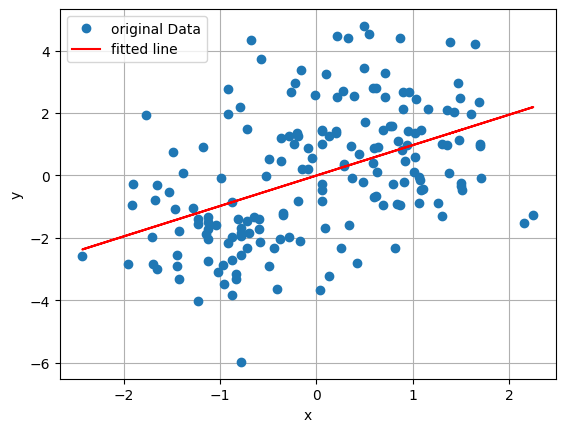

In [79]:
#### your solution here
from scipy.stats import linregress
wine['Variable significative']=wine[['Malic acid','Alcalinity of ash','Color intensity','Proline']].sum(axis=1)
slope, intercept, r_value, p_value, std_err = linregress(alcohol, wine['Variable significative'])

plt.plot(alcohol,wine['Variable significative'],'o', label='original Data')
plt.plot(alcohol, intercept + slope*alcohol,'r', label='fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

**Task EXTRA (if you have time left and motivated)**

In-depth: OLS with linear algebra. In matrix form OLS is written as:


<div style="font-size: 120%;">  
Y = X β + ϵ 
</div>

The $β$ 's in this case are the same as the coefficients in the statsmodel. To get the $β$ array:

$$ β = (1 / (X^T X))  (X^T Y) $$


In [48]:
np.random.seed(25)
x = np.random.normal(size = 40)
y = 1.6*x + np.random.normal(size = 40)

In [49]:
### Your code here: use the numpy package for linear algebra / matrix operations


**Task EXTRA** 

Understanding normality plot -- define method and code. Write your own code to plot normality of the residual

🌚 https://dodona.ugent.be/nl/activities/1859394339/#

In [50]:
### Your code here


## To summarize

* Linear regression models the relationship between an output (dependent) variable Y and one or more input (independent) variables X using the following equation:
> **Y= β0 ​+ β1*​X1 ​+ β2*​X2 ​+ ... + βp*​Xp ​+ ϵ**

* β0​, β1​, …, βp​ are the regression **coefficients**, representing the estimated effect of each predictor on Y. These are the parameters we aim to estimate.

* ϵ is the **error term**, capturing the variability in Y not explained by the model.

* **R²** measures the proportion of variance in Y that is explained by the predictors X. It ranges from 0 to 1, where higher values indicate a better fit.

* The **p-values** give the significance of predictors (null hypothesis: coefficient = 0).

* Key **assumptions** of linear regression include:
> 1. Linearity: The relationship between X and Y is linear.
> 2. Independence of errors: Residuals are uncorrelated.
> 3. Homoscedasticity: Residuals have constant variance across all levels of X.
> 4. Normality of residuals: Residuals are approximately normally distributed.
> 5. No multicollinearity: Predictors are not highly correlated with each other.

These assumptions are typically verified using **residual plots** and statistical tests to ensure the validity and reliability of the regression model.

* In Python, several libraries can perform linear regression. **statsmodels** is particularly useful for obtaining detailed results, including R² and adjusted R², coefficients and their statistical significance (p-values), and diagnostics for checking model assumptions.

* To avoid overfitting, it is important to retain only predictors that have a significant impact on Y. Methods like **backward selection** (iteratively removing the least significant predictors) can help achieve a parsimonious model.

* Linear regression is both used with a classical statistical approach (understanding and quantifying the relationship between Y and X) and Machine Learning approach (focuses on accurate prediction of Y)